# 파이썬으로 시작하는 데이터 분석 (Glass 데이터셋) 🔬

이 노트북은 **Glass(유리) 식별 데이터셋**을 사용하여 데이터 분석의 기초 3단계(**불러오기, 살펴보기, 시각화하기**)를 실습합니다. 

유리의 화학 성분을 기반으로 **어떤 종류(Type)의 유리인지 분류**하는 문제를 다룹니다. 각 코드 셀은 **한 줄 한 줄 상세한 주석**과 함께 설명되어 있어, 파이썬이나 데이터 분석이 처음인 분들도 쉽게 따라 하실 수 있도록 구성되었습니다.

## 준비: Google Colab에 파일 업로드하기

이 코드를 실행하기 전에, 먼저 `glass.dat` 파일을 Colab 환경에 업로드해야 합니다.

1.  화면 왼쪽의 **폴더 모양 아이콘**을 클릭하여 파일 탐색기를 엽니다.
2.  **'세션 저장소에 업로드' 아이콘**(파일 위 화살표 모양)을 클릭하거나, 컴퓨터에 있는 `glass.dat` 파일을 탐색기 창으로 드래그 앤 드롭합니다.
3.  `glass.dat` 파일이 목록에 나타나면 준비 완료입니다.

## 1단계: 라이브러리 불러오기 (Import Libraries)

데이터 분석을 시작하기 전에, 필요한 도구들이 들어있는 '도구 상자(라이브러리)'를 파이썬으로 가져와야 합니다. `import` 키워드는 특정 라이브러리를 이 노트북에서 사용하겠다고 선언하는 역할을 합니다.

In [1]:
# 'pandas'는 파이썬에서 데이터를 표(엑셀 시트와 유사한 형태)로 다루기 위한 가장 핵심적인 라이브러리입니다.
# 데이터를 불러오고, 정제하고, 기본적인 분석을 할 때 반드시 필요합니다.
# 'as pd'는 앞으로 이 노트북에서 pandas를 pd라는 짧은 이름으로 부르겠다는 약속(별명)입니다.
import pandas as pd

# 'matplotlib'는 파이썬의 대표적인 데이터 시각화 라이브러리로, 그래프를 그리는 기본 틀을 제공합니다.
# 그중에서도 pyplot 모듈은 그래프를 그리고 꾸미는 대부분의 기능을 포함하고 있습니다.
# 'as plt'는 pyplot을 plt라는 짧은 이름으로 부르겠다는 약속입니다.
import matplotlib.pyplot as plt

# 'seaborn'은 matplotlib을 기반으로 만들어진 라이브러리로, 더 다채롭고 통계적으로 아름다운 그래프를 쉽게 그릴 수 있게 도와줍니다.
# 'as sns'는 seaborn을 sns라는 짧은 이름으로 부르겠다는 약속입니다.
import seaborn as sns

## 2단계: 데이터 불러오기 (Load Data)

준비 단계에서 업로드한 `glass.dat` 파일을 pandas를 이용해 표 형태의 데이터 구조인 **데이터프레임(DataFrame)**으로 불러옵니다. 이 데이터셋의 각 열은 유리의 화학 성분을 나타냅니다.

In [2]:
# 분석할 파일의 이름인 'glass.dat'를 file_path라는 변수에 문자열로 저장합니다.
file_path = 'glass.dat'

# 원본 데이터 파일에는 각 열이 무엇을 의미하는지 이름이 적혀있지 않습니다.
# 따라서 우리가 직접 각 열에 해당하는 이름을 리스트(list) 형태로 만들어줍니다.
# 순서대로 굴절률(RI), 나트륨(Na), 마그네슘(Mg) 등 9가지 화학 성분과 마지막 유리 종류(Type)를 의미합니다.
column_names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# pandas의 read_csv 함수를 사용해 텍스트 파일을 데이터프레임으로 읽어옵니다.
# df라는 변수에 결과를 저장하는데, df는 DataFrame의 약자로 관례적으로 많이 사용됩니다.
df = pd.read_csv(
    file_path,               # 첫 번째 인자: 읽어올 파일의 경로
    sep='\s+',              # sep: 데이터를 구분하는 기준(구분자)을 지정합니다. '\s+'는 공백(space)이 한 개 이상이라는 뜻입니다.
    header=None,             # header: 파일의 첫 번째 줄이 열 이름(header)인지 여부를 지정합니다. None은 열 이름이 없다는 뜻입니다.
    names=column_names       # names: 열 이름이 없을 경우, 이 파라미터를 통해 우리가 직접 만든 column_names 리스트를 열 이름으로 사용하도록 지정합니다.
)

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jacob\AppData\Local\Temp\ipykernel_28028\4187852807.py:13: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',              # sep: 데이터를 구분하는 기준(구분자)을 지정합니다. '\s+'는 공백(space)이 한 개 이상이라는 뜻입니다.


## 3단계: 데이터 살펴보기 (Exploratory Data Analysis, EDA)

데이터를 불러온 후에는 가장 먼저 데이터가 제대로 들어왔는지, 어떤 구조와 특징을 가지고 있는지 탐색해야 합니다. 이 과정을 **탐색적 데이터 분석(EDA)**이라고 부릅니다.

### 3-1. 데이터 샘플 확인하기

`.head()`는 데이터프레임의 맨 앞부분(기본 5줄)을 보여주는 함수입니다. 데이터가 어떤 식으로 구성되어 있는지 빠르게 훑어볼 때 사용합니다.

In [3]:
# df 변수에 저장된 데이터프레임의 내용 중, 위에서부터 5개의 행을 출력합니다.
# 모든 값이 소수점을 포함한 숫자로 이루어진 것을 확인할 수 있습니다.
print("--- 데이터 샘플 (상위 5개) ---")
df.head()

--- 데이터 샘플 (상위 5개) ---


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### 3-2. 데이터 요약 정보 확인하기

`.info()`는 데이터프레임의 전체적인 정보를 요약해서 보여줍니다. 비어있는 값(결측치)이 없는지 확인하는 데 매우 중요합니다.

In [4]:
# 데이터프레임의 전체적인 정보를 출력합니다.
# 총 214개의 데이터가 있으며, 모든 열에 214개의 값이 채워져 있어 결측치는 없다는 것을 알 수 있습니다.
# 마지막 'Type' 열을 제외하고 모두 소수점(float64) 타입임을 확인할 수 있습니다.
print("--- 데이터 요약 정보 ---")
df.info()

--- 데이터 요약 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### 3-3. 기초 통계량 확인하기

`.describe()`는 숫자형 데이터 열에 대한 핵심 통계량을 요약해서 보여줍니다. 이 데이터셋에서는 **변수 간 스케일 차이가 매우 크다는 점**을 이 표를 통해 명확히 알 수 있습니다.

In [5]:
# 숫자형 데이터 타입을 가진 모든 열에 대해 기초 통계량을 계산하고 표 형태로 출력합니다.
print("--- 기초 통계량 ---")
df.describe()

--- 기초 통계량 ---


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### `.describe()` 결과 해석:
👉 **스케일 차이 확인**: `Si`(규소)의 평균은 약 72.6이지만 `Fe`(철)의 평균은 0.05에 불과합니다. 또한 `Ca`(칼슘)의 표준편차(std)는 1.44인데 `K`(칼륨)의 표준편차는 0.65입니다. 

👉 **중요**: 이처럼 변수들의 값의 범위(스케일)가 크게 다르면, 머신러닝 모델이 값의 범위가 큰 변수에만 과도하게 영향을 받을 수 있습니다. 따라서 이 데이터셋은 모델링 전에 **반드시 피처 스케일링(Feature Scaling)** 작업이 필요합니다.

## 4단계: 데이터 시각화하기 (Data Visualization)

Glass 데이터셋의 특징(연속형 변수, 클래스 불균형)을 잘 파악할 수 있는 그래프들을 그려보겠습니다.

### 4-1. 카운트 플롯으로 클래스 분포 확인하기

**카운트 플롯(Count Plot)**은 종속 변수인 `Type`(유리 종류)의 분포를 확인하여 클래스 불균형이 있는지 파악하는 데 가장 적합합니다.

C:\Users\jacob\AppData\Local\Temp\ipykernel_28028\2774813040.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type', palette='viridis')


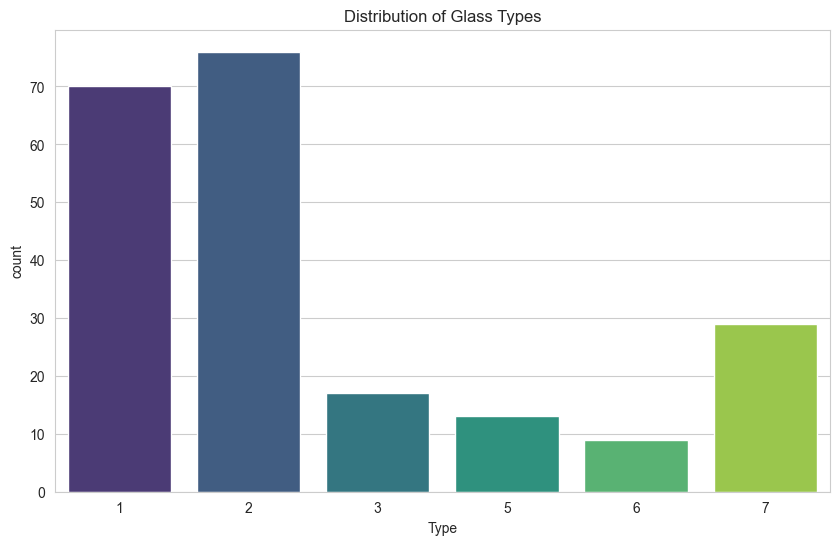

In [6]:
# seaborn의 set_style 함수로 그래프의 배경 스타일을 설정합니다.
sns.set_style('whitegrid')

# 그래프의 크기를 가로 10, 세로 6으로 설정합니다.
plt.figure(figsize=(10, 6))

# seaborn의 countplot 함수를 사용해 막대그래프를 그립니다.
# x='Type': x축의 데이터로 'Type' 열을 사용합니다. 각 유형(1, 2, 3, 5, 6, 7)별로 데이터 개수를 세어 막대로 표시합니다.
sns.countplot(data=df, x='Type', palette='viridis')

# 그래프의 제목을 추가합니다.
plt.title('Distribution of Glass Types')

# 그래프를 화면에 출력합니다.
plt.show()

#### 카운트 플롯 결과 해석:
👉 Type 1과 2(건물 창문)가 70개 이상으로 가장 많고, Type 6(식기)은 10개 미만으로 매우 적습니다. 이 데이터셋에 **클래스 불균형**이 존재함을 알 수 있습니다.

### 4-2. 박스 플롯으로 특징과 클래스 간의 관계 확인하기

**박스 플롯(Box Plot)**은 범주형 변수(여기서는 `Type`)에 따른 연속형 변수(`RI` 등)의 분포를 비교할 때 매우 유용합니다. 각 상자는 데이터의 50%를, 중간선은 중앙값을 나타냅니다.

C:\Users\jacob\AppData\Local\Temp\ipykernel_28028\3590327371.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='RI', palette='magma')


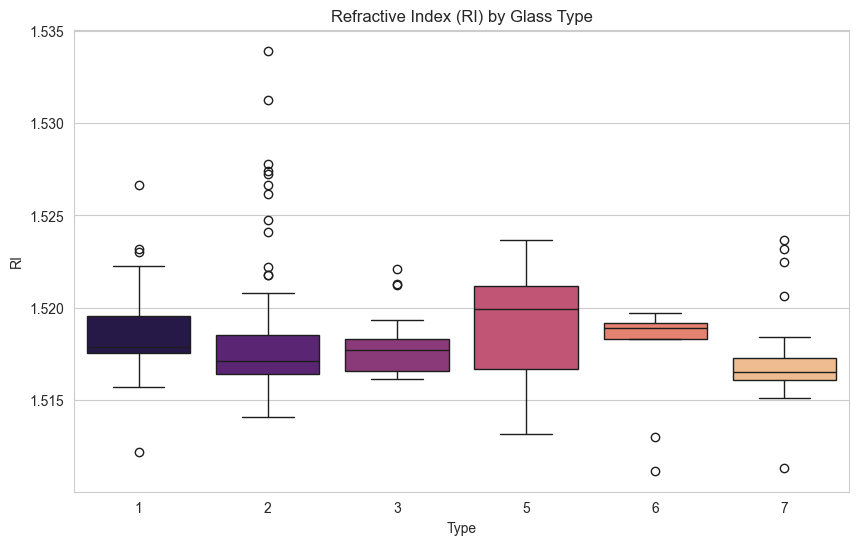

In [7]:
# 그래프의 크기를 설정합니다.
plt.figure(figsize=(10, 6))

# seaborn의 boxplot 함수를 사용해 박스 플롯을 그립니다.
# x='Type': x축을 유리 종류로 설정합니다.
# y='RI': y축을 굴절률(RI) 값의 분포로 설정합니다.
sns.boxplot(data=df, x='Type', y='RI', palette='magma')

# 그래프의 제목을 추가합니다.
plt.title('Refractive Index (RI) by Glass Type')

# 그래프를 화면에 출력합니다.
plt.show()

#### 결과 해석:
👉 유리 종류(Type)에 따라 굴절률(RI)의 중앙값과 분포가 조금씩 다른 것을 볼 수 있습니다. 예를 들어, Type 7(헤드램프)은 다른 유형에 비해 굴절률이 전반적으로 높은 경향을 보입니다. 이는 `RI`가 유리를 분류하는 데 유용한 특징이 될 수 있음을 시사합니다.

### 4-3. 히트맵으로 변수 간 상관관계 확인하기

**상관관계 히트맵(Correlation Heatmap)**은 모든 화학 성분(독립 변수) 쌍이 서로 얼마나 관련이 있는지를 색깔로 나타낸 표입니다. 특정 성분이 증가할 때 다른 성분도 함께 증가하거나 감소하는 경향을 파악할 수 있습니다.

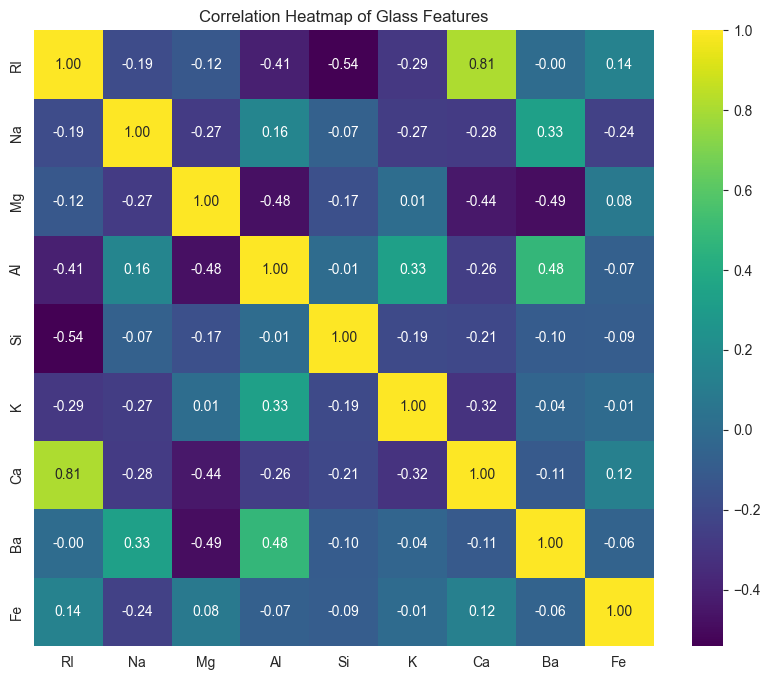

In [8]:
# 상관관계 계산 시, 분류 목표인 'Type' 열은 범주형이므로 제외합니다.
# df.drop('Type', axis=1)은 df에서 'Type' 열을 제거한 새로운 데이터프레임을 만드는 코드입니다.
correlation_matrix = df.drop('Type', axis=1).corr()

# 그래프의 크기를 가로 10, 세로 8로 설정합니다.
plt.figure(figsize=(10, 8))

# seaborn의 heatmap 함수를 사용해 상관관계 매트릭스를 시각화합니다.
# annot=True: 각 칸에 실제 상관계수 숫자를 표시해 주는 옵션입니다.
# cmap='viridis': 색상 테마를 지정합니다.
# fmt='.2f': 숫자를 소수점 둘째 자리까지 표시하도록 형식을 지정합니다.
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')

# 그래프의 제목을 추가합니다.
plt.title('Correlation Heatmap of Glass Features')

# 그래프를 화면에 출력합니다.
plt.show()

#### 히트맵 결과 해석:
👉 `RI`(굴절률)와 `Ca`(칼슘) 사이의 상관계수가 0.81로 매우 밝고 높은 것을 볼 수 있습니다. 이는 유리에 칼슘 함량이 높을수록 굴절률도 높아지는 강한 양의 상관관계가 있음을 의미합니다. 반대로, `RI`와 `Si`는 -0.54로 약간의 음의 상관관계를 보입니다.

## 정리 및 다음 단계

**Glass 데이터셋 분석을 성공적으로 마쳤습니다!**

이번 분석을 통해:
1.  모든 특징이 **연속형 변수**로 구성된 데이터셋을 다루어 보았습니다.
2.  기초 통계량(`.describe()`)과 시각화를 통해 **피처 스케일링의 필요성**과 **클래스 불균형**이라는 두 가지 중요한 문제를 발견했습니다.
3.  **박스 플롯**과 **히트맵**을 사용하여 변수들의 분포와 상호 관계를 깊이 있게 탐색했습니다.

이 데이터셋으로 머신러닝 모델을 만들 때는, 모델링을 시작하기 전에 **1) 피처 스케일링**과 **2) 클래스 불균형 처리**를 반드시 수행해야 좋은 성능을 기대할 수 있습니다. 이 두 가지 전처리 기법의 효과를 연구하기에 매우 좋은 데이터셋입니다.